In [3]:
import pydicom as pydicom
import os as os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#from plotly.tools import FigureFactory as FF
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

# Store the pixel_array in a list

In [4]:
path_one_aneurysm_image ='../data/aneurysms/imageData/combined/image/'
path_one_aneurysm_mask ='../data/aneurysms/imageData/combined/mask/'

one_aneurysm_per_image = [ ]
one_aneurysm_per_image_mask = [ ]

for filename in os.listdir(path_one_aneurysm_image):
    dataset = pydicom.dcmread(path_one_aneurysm_image + filename)
    one_aneurysm_per_image.append(dataset.pixel_array)
    
for filename in os.listdir(path_one_aneurysm_mask):
    dataset = pydicom.dcmread(path_one_aneurysm_mask + filename)
    one_aneurysm_per_image_mask.append(dataset.pixel_array)

print('Number of Patient images...',len(one_aneurysm_per_image))
print('Length of Patient masks...',len(one_aneurysm_per_image_mask))


Number of Patient images... 106
Length of Patient masks... 106


# Plot one image

In [7]:
def plot_3D(img, threshold= 1000):
    verts, faces = measure.marching_cubes_classic(img, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha= 0.8)
    face_color = [0.2, 0.3, 0.4]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, img.shape[0])
    ax.set_ylim(0, img.shape[1])
    ax.set_zlim(0, img.shape[2])   
    plt.show() 

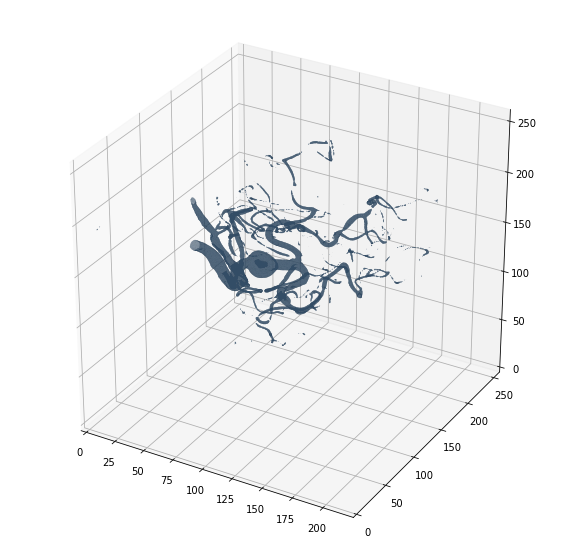

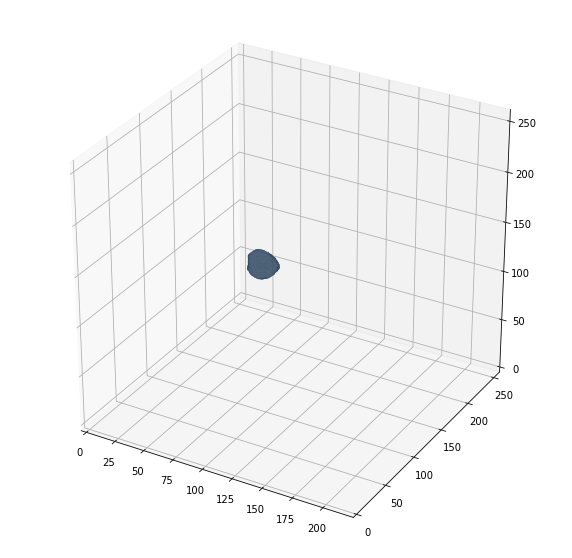

In [10]:

plot_3D(one_aneurysm_per_image[7], 900)



plot_3D(one_aneurysm_per_image_mask[7], 900)
#plt_3d(v, f)

#from skimage import io, color

#lina_gray = color.rgb2gray(one_aneurysm_per_image[0])

In [ ]:
#plot_3D(one_aneurysm_per_image_mask[8], 900)

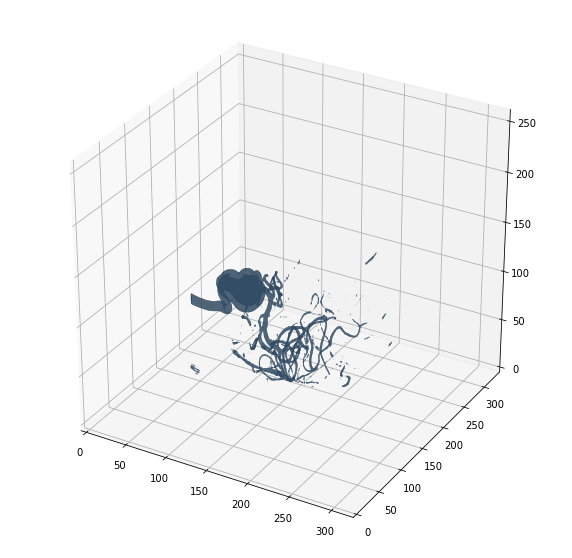

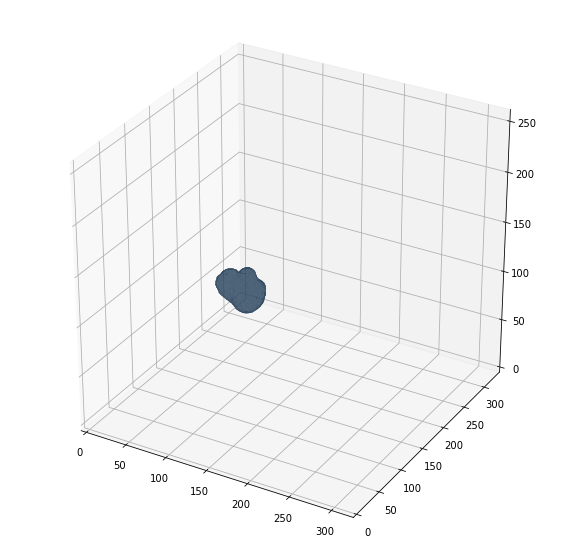

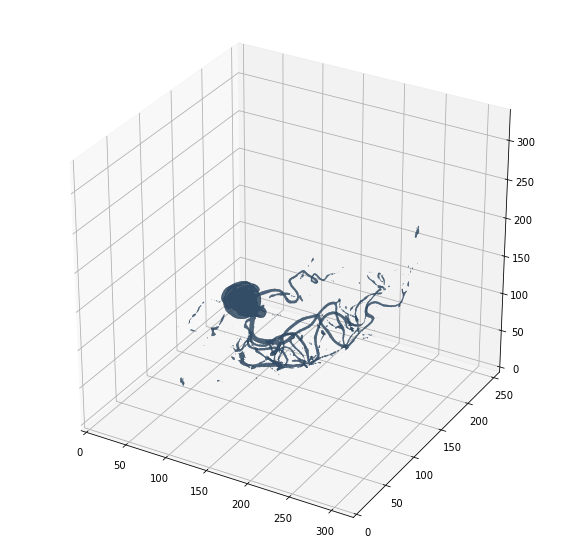

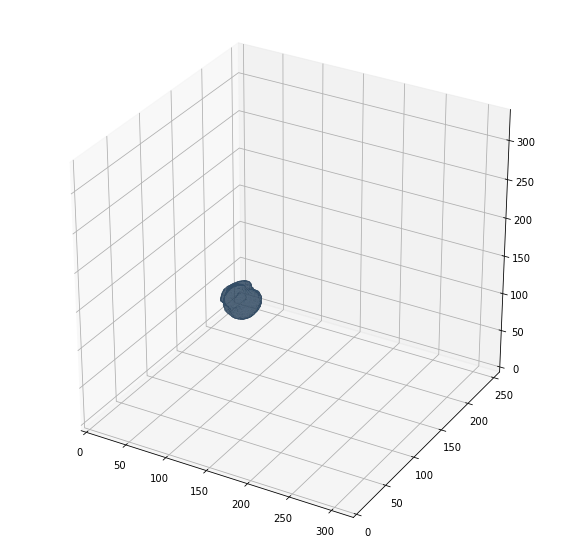

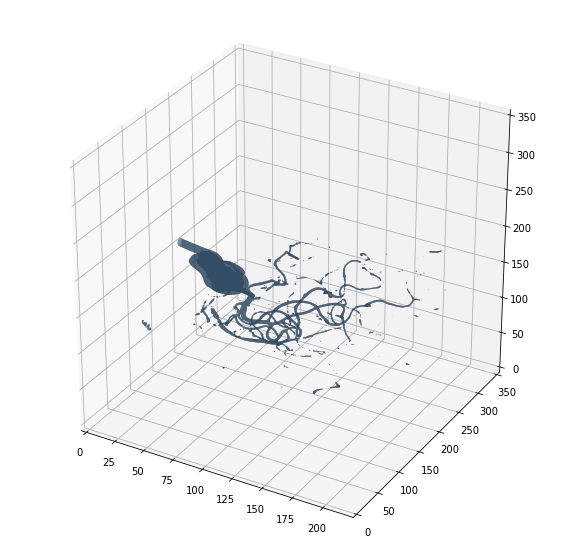

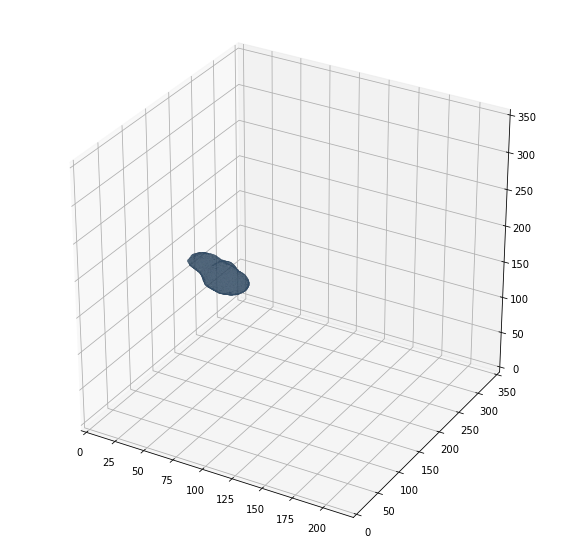

In [15]:
#random rotations along 3 axis
import scipy.ndimage
#z-axis
plot_3D(scipy.ndimage.interpolation.rotate(one_aneurysm_per_image[0], 30, axes=(0, 1), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True),900)
plot_3D(scipy.ndimage.interpolation.rotate(one_aneurysm_per_image_mask[0], 30, axes=(0, 1), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True),900)

#y-axis
plot_3D(scipy.ndimage.interpolation.rotate(one_aneurysm_per_image[0], 30, axes=(0, 2), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True),900)
plot_3D(scipy.ndimage.interpolation.rotate(one_aneurysm_per_image_mask[0], 30, axes=(0, 2), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True),900)

#x-axis
plot_3D(scipy.ndimage.interpolation.rotate(one_aneurysm_per_image[0], 30, axes=(1, 2), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True),900)
plot_3D(scipy.ndimage.interpolation.rotate(one_aneurysm_per_image_mask[0], 30, axes=(1, 2), reshape=True, output=None, order=3, mode='constant', cval=0.0, prefilter=True),900)


In [9]:
one_aneurysm_per_image[0].shape

(220, 256, 256)

# Find out the images not of the shape 220 ,256, 256 and preprocess them

In [5]:
need_processing=[]
orignal_image=[]

for image in one_aneurysm_per_image:
    if image.shape != (220,256,256):
        need_processing.append(image)
       # print ('Image Shape...',image.shape)
    else:
        orignal_image.append(image)
        
##Do the same for the masks##
need_processing_mask=[]
orignal_image_mask=[]

for image_mask in one_aneurysm_per_image_mask:
    if image_mask.shape != (220,256,256):
        need_processing_mask.append(image_mask)
        print ('Mask Shape...',image_mask.shape)
    else:
        orignal_image_mask.append(image_mask)
        

#plot_3D(not_processed_image[3], 1000)


Mask Shape... (228, 256, 256)
Mask Shape... (228, 256, 256)
Mask Shape... (221, 256, 256)
Mask Shape... (228, 256, 256)
Mask Shape... (440, 256, 256)
Mask Shape... (218, 256, 256)


In [6]:
pre_processed_data =[]
pre_processed_data_mask =[]
print('Orignal number of Images',len(one_aneurysm_per_image))
print('Orignal number of Masks',len(one_aneurysm_per_image_mask))

print('To be Processed Images-',len(need_processing))
print('To be Processed Masks-',len(need_processing_mask))

for image in need_processing:
    if image.shape[0] > 220:
        diff = image.shape[0]-220
        if diff >1 :
            if diff % 2 == 0:
                a = (diff/2)-1
                b= image.shape[0]-(diff/2)-1
                pre_processed_data.append(image[int(a):int(b),:,:])
        else:
            pre_processed_data.append(image[0:image.shape[0]-1,:,:])
    else: #218
        diff = 220- image.shape[0]
        print('diff',diff) #2
        pre_processed_data.append(np.pad(image, (0, diff), 'constant'))
        
for processed_image in pre_processed_data:
    print(processed_image.shape)
    
print('Length after pre_processing',len(pre_processed_data))


#Mask Generation-
print('In the mask....')
for image in need_processing_mask:
    if image.shape[0] > 220:
        diff = image.shape[0]-220
        if diff >1 :
            if diff % 2 == 0:
                a = (diff/2)-1
                b= image.shape[0]-(diff/2)-1
                pre_processed_data_mask.append(image[int(a):int(b),:,:])
        else:
            pre_processed_data_mask.append(image[0:image.shape[0]-1,:,:])
    else: #218
        diff = 220- image.shape[0]
        print('diff',diff) #2
        pre_processed_data_mask.append(np.pad(image, (0, diff), 'constant'))
        
for processed_image in pre_processed_data_mask:
    print(processed_image.shape)
    
print('Length after pre_processing Mask',len(pre_processed_data_mask))


Orignal number of Images 106
Orignal number of Masks 106
To be Processed Images- 6
To be Processed Masks- 6
diff 2
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 258, 258)
Length after pre_processing 6
In the mask....
diff 2
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 256, 256)
(220, 258, 258)
Length after pre_processing Mask 6


# Combining the Images together

In [7]:
one_aneurysm_per_image_processed= pre_processed_data+ orignal_image
print(len(one_aneurysm_per_image_processed))

#Mask-
one_aneurysm_per_image_processed_mask= pre_processed_data_mask+ orignal_image_mask
print(len(one_aneurysm_per_image_processed_mask))

106
106


# Converting the 3d image into 2d image

In [16]:
print('Total number of Patient Images', len(one_aneurysm_per_image_processed))
print('Total number of Patient Masks', len(one_aneurysm_per_image_processed_mask))
#for 106 dicom images, create one folder for each patient and divide each image into the depth number of times(220), ie generate slices of the image

path_image = '../data/aneurysms/imageData/combined/image/'
path_mask = '../data/aneurysms/imageData/combined/mask/'

for x in range(len(one_aneurysm_per_image_processed)):## 106
    name = 'Patient-'+ str(x)
    os.mkdir('./images/'+ name)
   #print(one_aneurysm_per_image_processed[x].shape[0])
   #print(range(one_aneurysm_per_image_processed[x].shape[0]))
    for i in range(one_aneurysm_per_image_processed[x].shape[0]):#220 times for each patient image
       # print(one_aneurysm_per_image_processed[x][i])
        slice_name = 'Slice'+str(x)+'_'+str(i)+'.jpeg'
        #save it to the folder images
        plt.imsave('./images/'+name+'/'+str(slice_name),one_aneurysm_per_image_processed[x][i])
                
        

Total number of Patient Images 106
Total number of Patient Masks 106


In [17]:
#Generating the mask

for x in range(len(one_aneurysm_per_image_processed_mask)):## 106 
    name = 'Patient-'+ str(x)
    os.mkdir('./masks/'+ name)
    for i in range(one_aneurysm_per_image_processed_mask[x].shape[0]): #220 times for each mask
        slice_name = 'Slice'+str(x)+'_'+str(i)+'.jpeg'
        #save it to the folder masks
        plt.imsave('./masks/'+name+'/'+str(slice_name),one_aneurysm_per_image_processed_mask[x][i])
                   